In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline

### Loading the dataset and displaying the first image

In [10]:
df = pd.read_csv('merged_data_final.csv')
print(df.head(5))

df["view"].fillna("AP",inplace=True) #All images with blank views are to be considered as AP view

   Unnamed: 0                  filename          label view
0           0  Radiography/NORMAL-1.PNG  non-infection   AP
1           1  Radiography/NORMAL-2.PNG  non-infection   AP
2           2  Radiography/NORMAL-3.PNG  non-infection   AP
3           3  Radiography/NORMAL-4.PNG  non-infection   AP
4           4  Radiography/NORMAL-5.PNG  non-infection   AP


Radiography/NORMAL-1.PNG


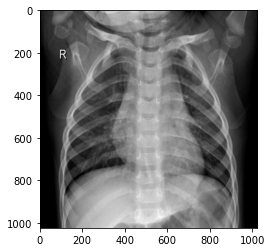

In [3]:
print(df.filename[0])
image = cv2.imread(df.filename[1])
#print(image)
plt.imshow(image)

## Cropping and resizing images

image with front view after cropping and resizing


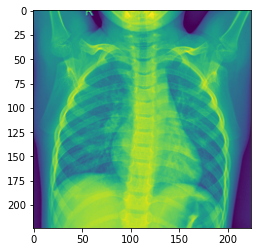

image with side view after cropping and resizing


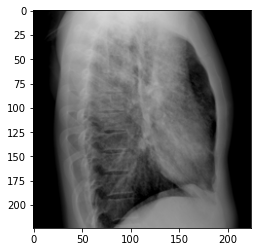

image with axial view after cropping and resizing


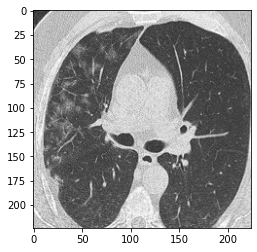

In [11]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#Resizing and cropping all the images as per their views
new_width  = 224
new_height = 224

count0 = 0
count1 = 0
count2 = 0
count3 = 0

# Counters to display the images
countimg1 = 0 
countimg2 = 0
countimg3 = 0

for ind in df.index:
    count3+=1
    if(df['label'][ind] == "non-infection"):
        count0+=1 
        img = Image.open(df['filename'][ind])
        width, height = img.size
        if((df['view'][ind] == "AP")| (df['view'][ind] =="AP Erect")|(df['view'][ind] == "AP Supine") 
           |(df['view'][ind] =="Coronal")|(df['view'][ind] == "PA")):
            countimg1+=1
            img = img.crop((75, 30, width-45, height-30)) #crop parameters are as follows: (left top and right bottom)
            img = img.resize((new_width, new_height))
            if(countimg1 == 1):
                print ("image with front view after cropping and resizing")
                plt.imshow(img) #To display the image after cropping and resizing
                plt.show()
        elif(df['view'][ind] == "L"):
            countimg2+=1
            img = img.crop((45, 25, width-70, height-45)) #crop parameters are as follows: (left top and right bottom)
            img = img.resize((new_width, new_height))
            if(countimg2 == 1):
                print ("image with side view after cropping and resizing")
                plt.imshow(img)
                plt.show()
        elif(df['view'][ind] == "Axial"):
            countimg3+=1
            img = img.crop((45, 40, width-45, height-24)) #crop parameters are as follows: (left top and right bottom)
            img = img.resize((new_width, new_height))
            if(countimg3 == 1):
                print ("image with axial view after cropping and resizing")
                plt.imshow(img)
                plt.show()
        img.save('FINAL/healthy/' + str(count0)+'.png') #saving the image in respective folder
    elif(df['label'][ind] == "covid-19 pneumonia"):
        count1+=1
        img = Image.open(df['filename'][ind])
        #print('width:', width)
        #print('height:', height)
        width, height = img.size
        if((df['view'][ind] == "AP")| (df['view'][ind] =="AP Erect")|(df['view'][ind] == "AP Supine") 
           |(df['view'][ind] =="Coronal")|(df['view'][ind] == "PA")):
            countimg1+=1
            img = img.crop((75, 30, width-45, height-30)) #crop parameters are as follows: (left top and right bottom)
            img = img.resize((new_width, new_height))
            if(countimg1 == 1):
                print ("image with front view after cropping and resizing")
                plt.imshow(img) #To display the image after cropping and resizing
                plt.show()
        elif(df['view'][ind] == "L"):
            countimg2+=1
            img = img.crop((45, 25, width-70, height-45)) #crop parameters are as follows: (left top and right bottom)
            img = img.resize((new_width, new_height))
            if(countimg2 == 1):
                print ("image with side view after cropping and resizing")
                plt.imshow(img) #To display the image after cropping and resizing
                plt.show()
        elif(df['view'][ind] == "Axial"):
            countimg3+=1
            img = img.crop((45, 40, width-45, height-24)) #crop parameters are as follows: (left top and right bottom)
            img = img.resize((new_width, new_height))
            if(countimg3 == 1):
                print ("image with axial view after cropping and resizing")
                plt.imshow(img) #To display the image after cropping and resizing
                plt.show()
        img.save('FINAL/covid_pneumonia/' + str(count1)+'.png')
    elif(df['label'][ind] == "non-covid-19 pneumonia"):
        count2+=1
        img = Image.open(df['filename'][ind])
        #print('width:', width)
        #print('height:', height)
        width, height = img.size
        if((df['view'][ind] == "AP")| (df['view'][ind] =="AP Erect")|(df['view'][ind] == "AP Supine") 
           |(df['view'][ind] =="Coronal")|(df['view'][ind] == "PA")):
            countimg1+=1
            img = img.crop((75, 30, width-45, height-30)) #crop parameters are as follows: (left top and right bottom)
            img = img.resize((new_width, new_height))
            if(countimg1 == 1):
                print ("image with front view after cropping and resizing")
                plt.imshow(img) #To display the image after cropping and resizing
                plt.show()
        elif(df['view'][ind] == "L"):
            countimg2+=1
            img = img.crop((45, 25, width-70, height-45)) #crop parameters are as follows: (left top and right bottom)
            img = img.resize((new_width, new_height))
            if(countimg2 == 1):
                print ("image with side view after cropping and resizing")
                plt.imshow(img) #To display the image after cropping and resizing
                plt.show()
        elif(df['view'][ind] == "Axial"):
            countimg3+=1
            img = img.crop((45, 40, width-45, height-24)) #crop parameters are as follows: (left top and right bottom)
            img = img.resize((new_width, new_height))
            if(countimg3 == 1):
                print ("image with axial view after cropping and resizing")
                plt.imshow(img) #To display the image after cropping and resizing
                plt.show()
        img.save('FINAL/pneumonia/' + str(count2)+'.png')
       

In [12]:
#printing the number of images for each category
print( "Healthy :" + str(count0) )
print( "Covid-Pneumonia : " + str(count1) )
print( "Non-Covid-Pneumonia : "+ str(count2) )
print( "Total : " + str(count3) )

Healthy :1471
Covid-Pneumonia : 734
Non-Covid-Pneumonia : 1702
Total : 3907
